# Using Alpha Vantage API to collect stock price data into Python

In [35]:
#Used for pulling the data
import urllib.request 
import json
#Used for formatting the data
import pandas as pd
#Used for data visualisation
import matplotlib.pyplot as plt
from matplotlib import style

In [150]:
#Returns a pandaDF of the closing stock prices in the last x amount of days
def getPriceOfStock(companySymbol, numOfDays): 
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+companySymbol+"&outputsize=full&apikey=Y11HUWNU7HM58RRL"
    json_obj = urllib.request.urlopen(url)
    #Finds the data from the url
    data = json.load(json_obj)
    #Choosing the revelant key from the data dictionary
    dates = data["Time Series (Daily)"] 
    #Initializing lists to store the data
    final_prices = [] 
    calendar = []
    counter = 0
    #For-loop used to run through every trading day 
    for day in dates: 
        counter += 1
        #Limits the amount of data using the number of days wanted
        if counter > numOfDays: 
            break
        #Gets the stock's price - This will include Open, High, Low, Closed prices
        prices = dates[day]
        #Choosing the stock's closed price
        priceNum = float(prices['4. close']) 
        final_prices.append(priceNum)
        calendar.append(day)
    #Dictionary containing the company and it's stock prices 
    final_prices.reverse()
    calendar.reverse()
    stockDict = {companySymbol : final_prices} #CHANGE
    #Formatting the pulled data to a Panda DataFrame
    df = pd.DataFrame(data = stockDict, index = pd.to_datetime(calendar))
    return df

In [200]:
#NOTE: Alpha Vantage only allows 5 API calls a minute, 500 a day -> Can only have an input size of list size 5
#Function to format (multiple) stocks into a PandaDF and alligns the dates
def bundleStockPrices(arrayOfCompanySymbols, numOfDays):
    largeTable = getPriceOfStock(arrayOfCompanySymbols[0], numOfDays) 
    del arrayOfCompanySymbols[0]
    for symbol in arrayOfCompanySymbols:
        smallTable = getPriceOfStock(symbol, numOfDays)
        #Concatenating the tables together -> will provide the intersection of all the data -> will provide <= 200 day data values
        #largeTable = pd.concat([largeTable, smallTable.reindex(largeTable.index)], axis = 1)
        largeTable = pd.concat([largeTable, smallTable], axis = 1, join ='inner')
    print("Any null data: "+str(largeTable.isnull().values.any()))
    print(SP500_fund_prices.head())
    print("...")
    print(SP500_fund_prices.tail())
    return largeTable

To visualise the general impact of COVID-19 we tracked a sample of S&P500 index tracker funds:
- Fidelity® 500 Index Fund, FXAIX
- Schwab® S&P 500 Index Fund, SWPPX
- Vanguard 500 Index Fund Investor Shares, VFINX
- SPDR S&P 500 ETF Trust, SPY

In [201]:
SP500TickerSymbol = ['FXAIX','SWPPX','VFINX','SPY']
SP500_fund_prices = bundleStockPrices(SP500TickerSymbol, 200)

Any null data: False
             FXAIX  SWPPX   VFINX     SPY
2019-09-27  103.40  45.94  273.32  295.40
2019-09-30  103.92  46.17  274.71  296.77
2019-10-01  102.65  45.61  271.36  293.24
2019-10-02  100.82  44.79  266.50  288.06
2019-10-03  101.65  45.16  268.69  290.42
...
             FXAIX  SWPPX   VFINX     SPY
2020-07-07  109.55  48.58  290.34  313.78
2020-07-08  110.41  48.96  292.62  316.18
2020-07-09  109.82  48.70  291.05  314.38
2020-07-10  110.47  49.21  294.09  317.59
2020-07-13  109.43  48.75  291.34  314.84


In [184]:
def plotLineGraph(title, df):
    try:
        #Opens the figure
        plt.figure()
        #Plot the stock data points
        df.plot()
        #Display a title
        plt.title(title)
        #Display a legend to help navigate the graph
        plt.legend(df.columns)
    except:
        print("There was an error. Please check your dataframe.")

<Figure size 432x288 with 0 Axes>

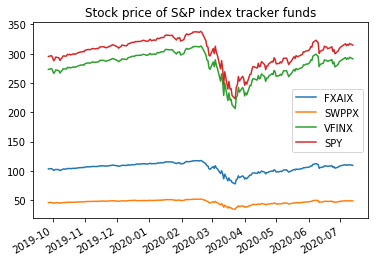

In [185]:
plotLineGraph("Stock price of S&P index tracker funds", SP500_fund_prices)

### Impact on certain industries in the market:

Tracking some of the largest airline companies (by revenue):
- Delta Air Lines, DAL
- American Airlines, AAL
- Deutsche Lufthansa, DLAKF
- United Airlines, UAL
- Air France KLM, AFRAF

Shown in the graph below, the airline industry was one of the largest areas hit by the pandemic

In [203]:
airlineCompanies = ['DAL','AAL','DLAKF','UAL','AFRAF']
airline_prices = bundleStockPrices(airlineCompanies, 200)

Any null data: False
             FXAIX  SWPPX   VFINX     SPY
2019-09-27  103.40  45.94  273.32  295.40
2019-09-30  103.92  46.17  274.71  296.77
2019-10-01  102.65  45.61  271.36  293.24
2019-10-02  100.82  44.79  266.50  288.06
2019-10-03  101.65  45.16  268.69  290.42
...
             FXAIX  SWPPX   VFINX     SPY
2020-07-07  109.55  48.58  290.34  313.78
2020-07-08  110.41  48.96  292.62  316.18
2020-07-09  109.82  48.70  291.05  314.38
2020-07-10  110.47  49.21  294.09  317.59
2020-07-13  109.43  48.75  291.34  314.84


<Figure size 432x288 with 0 Axes>

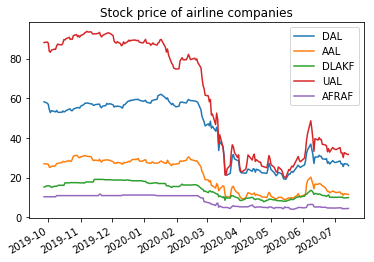

In [194]:
plotLineGraph("Stock price of airline companies", airline_prices)
#To zoom in:
#plt.xlim(pd.to_datetime("2020-03-01"),pd.to_datetime("2020-04-01")) #Year-Month-Day

One part of the market that recovered reasonably well was the pharmaceutical industry:
- Johnson & Johnson, JNJ
- Roche, RHHBF
- Sinopharm Group, SHTDF
- Pfizer, PFE
- GlaxoSmithKline, GSK

In [205]:
biomedicalCompanies = ['JNJ','RHHBF','SHTDF','PFE','GSK']
biomedical_prices = bundleStockPrices(biomedicalCompanies, 200)

Any null data: False
             FXAIX  SWPPX   VFINX     SPY
2019-09-27  103.40  45.94  273.32  295.40
2019-09-30  103.92  46.17  274.71  296.77
2019-10-01  102.65  45.61  271.36  293.24
2019-10-02  100.82  44.79  266.50  288.06
2019-10-03  101.65  45.16  268.69  290.42
...
             FXAIX  SWPPX   VFINX     SPY
2020-07-07  109.55  48.58  290.34  313.78
2020-07-08  110.41  48.96  292.62  316.18
2020-07-09  109.82  48.70  291.05  314.38
2020-07-10  110.47  49.21  294.09  317.59
2020-07-13  109.43  48.75  291.34  314.84


<Figure size 432x288 with 0 Axes>

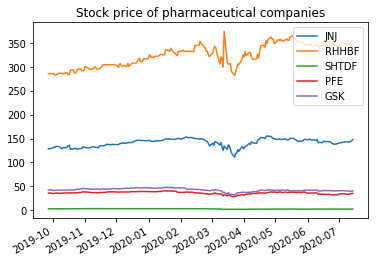

In [204]:
plotLineGraph("Stock price of pharmaceutical companies", biomedical_prices)
#To zoom in:
#plt.xlim(pd.to_datetime("2020-03-01"),pd.to_datetime("2020-04-01")) #Year-Month-Day

In [143]:
def averagePctChange(table, industry):
    percentage_change = table.pct_change()
    percentage_change = percentage_change.drop(percentage_change.index[0])
    percentage_change[industry+" ROC"] = percentage_change.sum(axis = 1)
    percentage_change[industry+" ROC"] =  percentage_change[industry+" ROC"].map(lambda x: x/3)
    for column in table:
        if column == industry+" ROC":
            break
        del percentage_change[column]
    return percentage_change

- Given the effect of COVID-19 on the market we seek to look at the daily percentage change of stock prices in the mentioned industries.
- Shown from the graph below we see that before COVID-19 the market price volatility was relatively small and stable throughout the market.
- Whilst the S&P500 index funds are down prior to the pandemic we see that along with the pharmaceutical industry the rate of change of the stocks are stabilising again.
- Aviation however is still very volitile and indiciates that the market is still very uncertain. 

- It should be noted that results were calculated using percentage changes daily which means the graph is more 'jumpy' than if you take the normal ROC values of time . 

<Figure size 432x288 with 0 Axes>

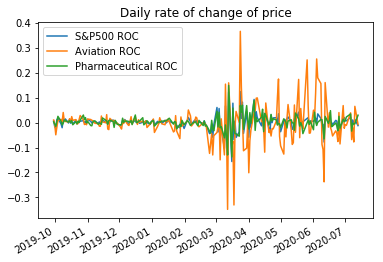

In [189]:
SP500_APC = averagePctChange(SP500_fund_prices, "S&P500")
airline_APC = averagePctChange(airline_prices, "Aviation")
bio_APC = averagePctChange(biomedical_prices, "Pharmaceutical")
ROC_data  = pd.concat([SP500_APC, airline_APC, bio_APC], axis = 1, join ='inner')
plotLineGraph("Daily rate of change of price", ROC_data)
#To zoom in:
#plt.xlim(pd.to_datetime("2020-03-01"),pd.to_datetime("2020-04-01")) #Year-Month-Day